In [2]:
pip install pandas 

In [3]:
pip install plotly

In [4]:
pip install matplotlib

In [5]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Samil\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning:

Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).



In [6]:
raw_dataset=pd.read_csv("Doublet_EAF_35FD.csv",sep=",")

In [7]:
 Doublet_EAF_35FD= raw_dataset.copy()
Doublet_EAF_35FD.head()

,Date,Longitude,Latitude,Depth,Magnitude
0,06/02/2023 23:56:02,37.510,37.976,11.70,3.9
1,06/02/2023 23:54:15,36.667,38.069,6.98,3.8
2,06/02/2023 23:49:55,36.081,36.248,7.62,3.7
3,06/02/2023 23:45:43,37.175,38.054,6.99,3.7
4,06/02/2023 23:36:24,37.151,38.221,7.00,3.8


In [8]:
Doublet_EAF_35FD.shape

(425, 5)

In [9]:
x = Doublet_EAF_35FD.iloc[:,1].values
y = Doublet_EAF_35FD.iloc[:,2].values
z = Doublet_EAF_35FD.iloc[:,3].values
colors = Doublet_EAF_35FD.iloc[:,4].values
sizes = Doublet_EAF_35FD.iloc[:,4].values*25

In [12]:
import plotly.graph_objects as go

# Obtain high-resolution world map data online
fig = go.Figure(go.Choroplethmapbox(
    geojson="https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json",
    locations=["USA", "CAN", "MEX", "RUS", "CHN"],  # Example country codes (USA, Canada, Mexico, Russia, China)
    z=[1, 1, 1, 1, 1],  # Values to be assigned to countries (all set to 1)
    colorscale='Jet',  # Color scale name (Viridis, YlGnBu, Jet, etc.)
    zmin=3,
    zmax=8,
    marker_opacity=0.9,  # Opacity of country borders
    marker_line_width=1,  # Thickness of country borders
))

# Create sample earthquake data
earthquake_data = {
    'Longitude': x,
    'Latitude': y,
    'Magnitude': colors,
}

# Add earthquake data with Scatter plot
fig.add_trace(go.Scattermapbox(
    lat=earthquake_data['Latitude'],
    lon=earthquake_data['Longitude'],
    mode='markers',
    marker=dict(
        size=earthquake_data['Magnitude'] * 2,  # Set point sizes based on Magnitude value
        color=earthquake_data['Magnitude'],  # Set color scale based on Magnitude value
        colorscale='Jet',  # Color scale name (Viridis, YlGnBu, Jet, etc.)
    ),
))

# Specify map layout and style
fig.update_layout(
    mapbox_style="open-street-map",  # Set map style (for other styles: "open-street-map", "stamen-terrain", etc.)
    mapbox_zoom=6,  # Set map zoom level
    mapbox_center={"lat": 37.0000, "lon": 37.0000},  # Set map center (center of the USA)
)

# Increase resolution and font size
fig.update_layout(
    width=700,  # Set width to increase resolution
    height=630,  # Set height to increase resolution
    font=dict(
        size=28  # Set font size for English comments
    )
)

# Display the plot
fig.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display



# İnteraktif işlev

def plot_3d_scatter(elev, azim, zoom, theta):
    fig = plt.figure(figsize=(12, 8)) 
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet')
    cbar = plt.colorbar(ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet'))    
    cbar.set_label('Magnitude')  

    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Depth_km')  
    ax.dist = zoom  # Zoom ayarı
    ax.azim = theta  # Maus ile çevirme
    plt.show()

# İnteraktif widget'ı oluşturma
elev_slider = widgets.IntSlider(min=0, max=180, value=30, description='Elevation:')
azim_slider = widgets.IntSlider(min=0, max=360, value=30, description='Azimuth:')
zoom_slider = widgets.FloatSlider(min=1, max=10, value=5, description='Zoom:')
theta_slider = widgets.IntSlider(min=0, max=360, value=30, description='Theta:')
interactive_plot = interactive(plot_3d_scatter, elev=elev_slider, azim=azim_slider, zoom=zoom_slider, theta=theta_slider)

# Widget'ı görüntüleme
display(interactive_plot)

interactive(children=(IntSlider(value=30, description='Elevation:', max=180), IntSlider(value=30, description=…

In [26]:
x = Doublet_EAF_35FD.iloc[:,1].values
y = Doublet_EAF_35FD.iloc[:,2].values
z = Doublet_EAF_35FD.iloc[:,0].values
colors = Doublet_EAF_35FD.iloc[:,4].values
sizes = Doublet_EAF_35FD.iloc[:,4].values*8

In [27]:
z

array(['06/02/2023 23:56:02', '06/02/2023 23:54:15',
       '06/02/2023 23:49:55', '06/02/2023 23:45:43',
       '06/02/2023 23:36:24', '06/02/2023 23:32:04',
       '06/02/2023 23:30:06', '06/02/2023 23:29:15',
       '06/02/2023 23:21:06', '06/02/2023 23:17:11',
       '06/02/2023 23:13:27', '06/02/2023 23:11:38',
       '06/02/2023 23:01:55', '06/02/2023 22:55:26',
       '06/02/2023 22:51:17', '06/02/2023 22:45:03',
       '06/02/2023 22:44:54', '06/02/2023 22:42:01',
       '06/02/2023 22:37:38', '06/02/2023 22:34:20',
       '06/02/2023 22:29:39', '06/02/2023 22:28:07',
       '06/02/2023 22:26:17', '06/02/2023 22:23:35',
       '06/02/2023 22:20:42', '06/02/2023 22:14:01',
       '06/02/2023 22:11:35', '06/02/2023 22:09:50',
       '06/02/2023 22:06:14', '06/02/2023 22:04:42',
       '06/02/2023 22:01:06', '06/02/2023 21:57:43',
       '06/02/2023 21:51:33', '06/02/2023 21:41:26',
       '06/02/2023 21:39:39', '06/02/2023 21:38:46',
       '06/02/2023 21:35:08', '06/02/2023 21:3

In [28]:
from datetime import datetime

# Zaman damgalarını içeren bir liste oluştur
timestamps = z

# Zaman damgalarını saniyeye dönüştür
seconds = [datetime.timestamp(datetime.strptime(timestamp, '%d/%m/%Y %H:%M:%S')) for timestamp in timestamps]

print(seconds) # Saniye cinsinden zaman damgalarını görüntüle

[1675716962.0, 1675716855.0, 1675716595.0, 1675716343.0, 1675715784.0, 1675715524.0, 1675715406.0, 1675715355.0, 1675714866.0, 1675714631.0, 1675714407.0, 1675714298.0, 1675713715.0, 1675713326.0, 1675713077.0, 1675712703.0, 1675712694.0, 1675712521.0, 1675712258.0, 1675712060.0, 1675711779.0, 1675711687.0, 1675711577.0, 1675711415.0, 1675711242.0, 1675710841.0, 1675710695.0, 1675710590.0, 1675710374.0, 1675710282.0, 1675710066.0, 1675709863.0, 1675709493.0, 1675708886.0, 1675708779.0, 1675708726.0, 1675708508.0, 1675708478.0, 1675707899.0, 1675707818.0, 1675707586.0, 1675707317.0, 1675707226.0, 1675707178.0, 1675706790.0, 1675706595.0, 1675706525.0, 1675706293.0, 1675706148.0, 1675706040.0, 1675706002.0, 1675705440.0, 1675705289.0, 1675705205.0, 1675705071.0, 1675704901.0, 1675704372.0, 1675704190.0, 1675704114.0, 1675703754.0, 1675703650.0, 1675703589.0, 1675703507.0, 1675703420.0, 1675703308.0, 1675703134.0, 1675703122.0, 1675702946.0, 1675702679.0, 1675702495.0, 1675702358.0, 16757

In [30]:
seconds

[1675716962.0,
 1675716855.0,
 1675716595.0,
 1675716343.0,
 1675715784.0,
 1675715524.0,
 1675715406.0,
 1675715355.0,
 1675714866.0,
 1675714631.0,
 1675714407.0,
 1675714298.0,
 1675713715.0,
 1675713326.0,
 1675713077.0,
 1675712703.0,
 1675712694.0,
 1675712521.0,
 1675712258.0,
 1675712060.0,
 1675711779.0,
 1675711687.0,
 1675711577.0,
 1675711415.0,
 1675711242.0,
 1675710841.0,
 1675710695.0,
 1675710590.0,
 1675710374.0,
 1675710282.0,
 1675710066.0,
 1675709863.0,
 1675709493.0,
 1675708886.0,
 1675708779.0,
 1675708726.0,
 1675708508.0,
 1675708478.0,
 1675707899.0,
 1675707818.0,
 1675707586.0,
 1675707317.0,
 1675707226.0,
 1675707178.0,
 1675706790.0,
 1675706595.0,
 1675706525.0,
 1675706293.0,
 1675706148.0,
 1675706040.0,
 1675706002.0,
 1675705440.0,
 1675705289.0,
 1675705205.0,
 1675705071.0,
 1675704901.0,
 1675704372.0,
 1675704190.0,
 1675704114.0,
 1675703754.0,
 1675703650.0,
 1675703589.0,
 1675703507.0,
 1675703420.0,
 1675703308.0,
 1675703134.0,
 167570312

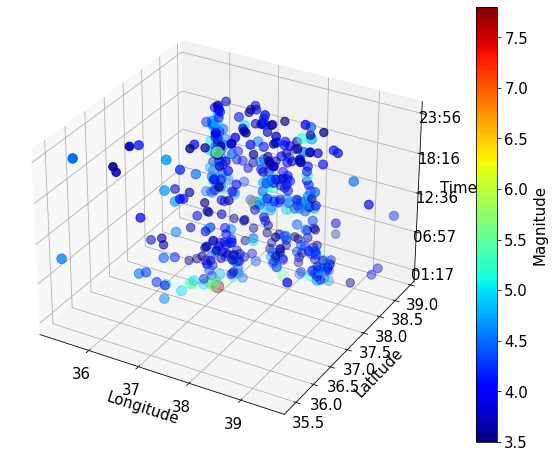

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from datetime import datetime

# Assuming Doublet_EAF_35F3 is a DataFrame with appropriate columns
x = Doublet_EAF_35FD.iloc[:, 1].values
y = Doublet_EAF_35FD.iloc[:, 2].values
z = seconds 
colors = Doublet_EAF_35FD.iloc[:, 4].values
sizes = Doublet_EAF_35FD.iloc[:, 4].values * 20

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet')

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Magnitude')

# Labeling axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time')

# Formatting time ticks
# Assuming seconds is a list or array of time values
# Adjust the ticks and labels according to your data
time_ticks = np.linspace(min(seconds), max(seconds), 5)
time_labels = [datetime.fromtimestamp(t).strftime('%H:%M') for t in time_ticks]  # Format güncellendi
ax.set_zticks(time_ticks)
ax.set_zticklabels(time_labels)

# Adjust font size
plt.rc('font', size=15)

plt.show()